In [1]:
import rtk

In [2]:
fixed_img = rtk.image.ScalarImage(filename='data/square.nii')
moving_img = rtk.image.ScalarImage(filename='data/circle.nii')

In [3]:
reg = rtk.registration.LDDMM(
        ndim=fixed_img.ndim,
        n_step=32,
        penalty=1000,
        regularizer=rtk.regularizer.BiharmonicRegularizer(
            convexity_penalty=1., norm_penalty=1.),
        similarity='ssd',
        n_iters=(50, 20, 10),
        resolutions=(4, 2, 1),
        smoothing_sigmas=(2, 1, 0),
        delta_phi_threshold=1.,
        unit_threshold=0.1,
        learning_rate=0.1,
        parallel=False)

LDDMM
similarity metric ssd
regularization BiharmonicRegularizer
iterations (50, 20, 10)
resolutions (4, 2, 1)
smoothing sigmas (2, 1, 0)
threshold of displacement update 1.0
threshold of grid unit 0.1
learning rate 0.1
parallel computation False
number of cpu cores 1


In [4]:
reg.set_images(fixed_img, moving_img)

In [5]:
warp = reg.execute()

resolution 4
iteration   0, Energy 3746942.919520
iteration   1, Energy 831653.591365
               minimum unit 0.623073724331
               delta phi 1.46553755452
               maximum delta phi 73.276877726
iteration   2, Energy 284148.040354
               minimum unit 0.504585873579
               delta phi 0.666082627782
               maximum delta phi 32.6380487613
iteration   3, Energy 196789.797035
               minimum unit 0.460294494802
               delta phi 0.2384468128
               maximum delta phi 11.4454470144
iteration   4, Energy 175092.406238
               minimum unit 0.453697453314
               delta phi 0.0872382443008
               maximum delta phi 4.10019748214
iteration   5, Energy 164257.202087
               minimum unit 0.450572451524
               delta phi 0.0472059304843
               maximum delta phi 2.17147280228
iteration   6, Energy 157027.542880
               minimum unit 0.447466358095
               delta phi 0.0300622937362
  

In [6]:
warped_moving_img = moving_img.apply_transform(warp)

In [7]:
%matplotlib inline

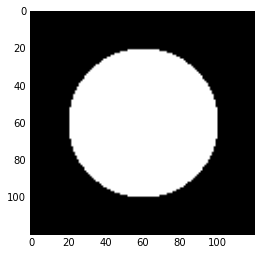

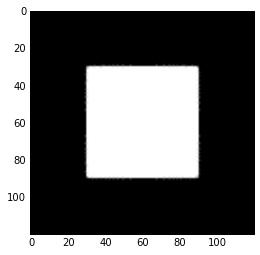

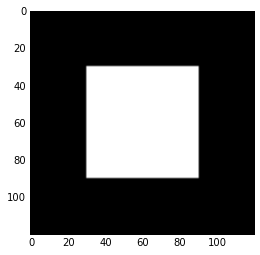

In [8]:
moving_img.show()
warped_moving_img.show()
fixed_img.show()

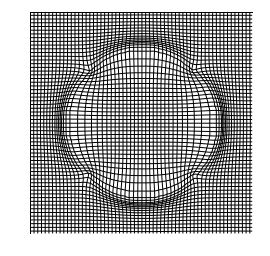

In [9]:
warp.show(interval=2)